<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/Tarefa_4_afdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Tarefa da Semana 4**

Esta é a quarta tarefa do curso de Programação para Sensoriamento Remoto. Novamente, crie um Jupyter Notebook no seu Google Colab para reportar os resultados obtidos. Inclua blocos de código e texto para informar as partes realizadas. 

Atividades


Dadas 2 imagens pancromáticas da mesma região, registradas, com diferença temporal de aproximadamente 3 anos, realize uma análise de mudança da cobertura do solo:

[CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif](https://drive.google.com/file/d/14roAvy251WSHph6r4_7TDiqGkFPwFxmg/view?usp=sharing) (imagem t1, Julho de 2015)
[CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif](https://drive.google.com/file/d/1rrNcCGr3Ob2LaWtW8SP17RF6hxZJW3hw/view?usp=sharing) (imagem t2, Setembro de 2018).


(a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

(b) crie uma nova matriz **delta = t2 - t1** utilizando os operadores aritméticos da NumPy. Gere uma visualização desta matriz, e apresente um scatterplot contendo como eixos, as imagens 𝑡1,𝑡2.

Observação: Veja que a imagem 𝑡1 possui uma linha a mais que a imagem 𝑡2. Você precisará ajustar a imagem 𝑡1 descartando a última linha.

(c) verifique os limites mínimos e máximos da matriz resultante, e defina um intervalo de pixels que você considera como **mudança** e um intervalo que considera como **não mudança**. A partir destes intervalos, gere uma visualização de uma classificação de **mudança** versus **não mudança**.
Atenção: apresente o link do seu Jupyter Notebook, através da opção Compartilhar do próprio Google Colab, da seguinte forma:

*   Compartilhar
*   Mudar para qualquer pessoa com o link
*   Copiar link






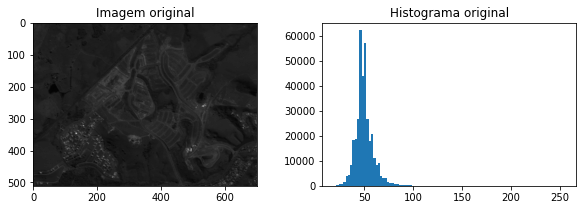

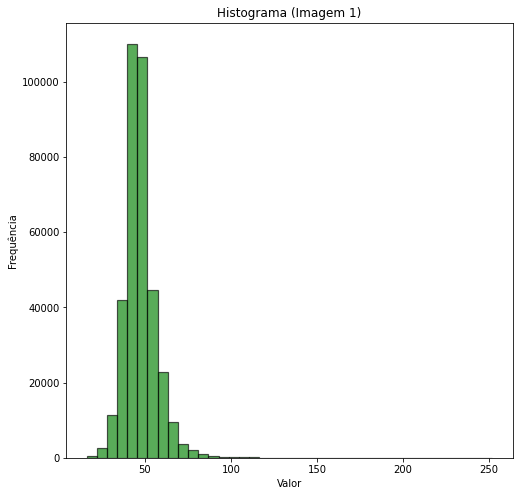

In [44]:
# USANDO O SCRIPT EXEMPLO 
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# Abrir a primeira imagem (1)
dataset = gdal.Open('CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif', gdal.GA_ReadOnly)

# obter a banda (neste caso a imagem só tem 1 banda)  (1)
banda = dataset.GetRasterBand(1)

# obter a matriz de pixels da banda  (1)
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz, cmap='gray')
plt.title('Imagem original');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

# (a) abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values = matriz.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 1)")
plt.xlabel("Valor")
plt.ylabel("Frequência");




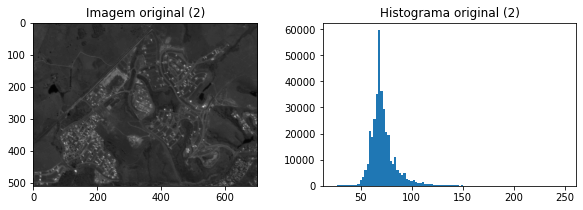

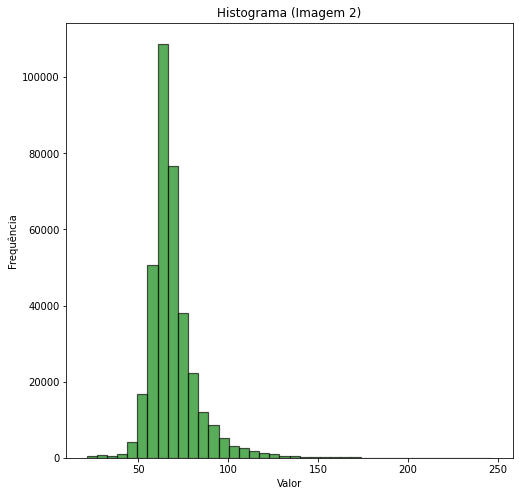

In [45]:
# Abrir a segunda imagem (2)
dataset2 = gdal.Open('CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif', gdal.GA_ReadOnly)

# obter a banda (neste caso a imagem só tem 1 banda)  (1)
banda2 = dataset2.GetRasterBand(1)

# obter a matriz de pixels da banda  (1)
matriz2 = banda2.ReadAsArray().astype(int)

# plotar a imagem e o histograma (1)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz2, cmap='gray')
plt.title('Imagem original (2)');
plt.subplot(122)
plt.hist(matriz2.flatten(), bins=100)
plt.title('Histograma original (2)');

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values2 = matriz2.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values2, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 2)")
plt.xlabel("Valor")
plt.ylabel("Frequência");




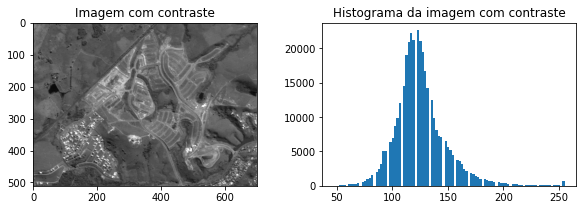

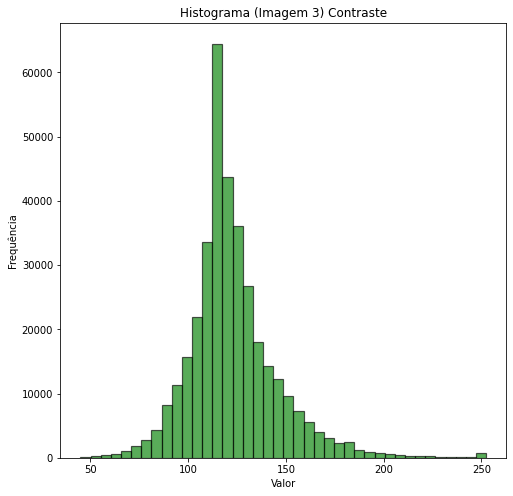

In [46]:
# Para fazer o contraste, podemos multiplicar os pixels da matriz por um valor constante, e depois verificar
# se alguns pixels não ultrapassaram o limite (neste caso uma imagem de 8 bits, os valores válidos variam entre 0 e 255).
# definir um valor de ganho e aplicar
ganho = 2.5
matriz_contraste = matriz * ganho

# verificar valores fora do limite
limite = 255
matriz_contraste[matriz_contraste > limite] = limite

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz_contraste, cmap='gray')
plt.title('Imagem com contraste');
plt.subplot(122)
plt.hist(matriz_contraste.flatten(), bins=100)
plt.title('Histograma da imagem com contraste');

# Vamos considerar o seguinte exemplo extraído da galeria da Matplotlib e do site da NumPy: Gerando Histrograma
values3 = matriz_contraste.flatten()

plt.figure( figsize=(8, 8) )
plt.hist(values3, bins=40, density=False, align='left',
         facecolor='green', edgecolor='black', linewidth=1.2, alpha=0.65);
       
plt.title(r"Histograma (Imagem 3) Contraste")
plt.xlabel("Valor")
plt.ylabel("Frequência");
 

In [5]:
# Para salvar a nova imagem, contida na variável matriz_contraste, podemos aproveitar os metadados da imagem original, 
# e informar a nova matriz.
# definir o nome do arquivo de saída
nome_do_arquivo = 'imagem_com_contraste.tif'
# definir driver, neste caso GeoTIFF
driver = gdal.GetDriverByName('GTiff')

# obter metadados da imagem original
linhas = dataset.RasterYSize
colunas = dataset.RasterXSize
bandas = dataset.RasterCount
tipo_de_dados = dataset.GetRasterBand(1).DataType

# criar novo dataset
dataset_novo = driver.Create(nome_do_arquivo, 
                               colunas, 
                               linhas, 
                               bandas, 
                               tipo_de_dados)
# copiar informações espaciais da banda já existente
dataset_novo.SetGeoTransform(dataset.GetGeoTransform())
# copiar informações de projeção
dataset_novo.SetProjection(dataset.GetProjectionRef())
# escrever dados da matriz_contraste na banda
dataset_novo.GetRasterBand(1).WriteArray(matriz_contraste)
# salvar valores
dataset_novo.FlushCache()
# fechar dataset
dataset_novo = None

<Figure size 720x360 with 0 Axes>

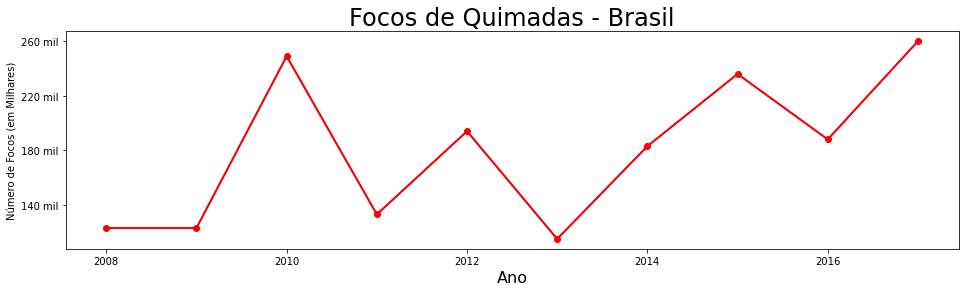

In [6]:
# (b) crie uma nova matriz delta = t2 - t1 utilizando os operadores aritméticos da NumPy. 
# Gere uma visualização desta matriz, e apresente um scatterplot contendo como eixos, 
# as imagens 𝑡1,𝑡2.
# Observação: Veja que a imagem 𝑡1 possui uma linha a mais que a imagem 𝑡2. Você precisará ajustar a 
# imagem 𝑡1 descartando a última linha.

# importar bibliotecas
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de Vetor/Matriz
# Eixo X  
ano = [ 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ]
# Eixo Y
num_focos = [ 123, 123, 249, 133, 194, 115, 183, 236, 188, 260 ]

# Saída
# Tamanho da Figura
plt.figure( figsize=(10, 5))

# Outra forma figaspect = 1/4 = 0.25
plt.figure( figsize=plt.figaspect(0.25))


# Eixo x e y
plt.plot(ano, num_focos)

# Descrição dos eixos
plt.xlabel("Ano", fontsize=16)
plt.ylabel("Número de Focos (em Milhares)")

# Titulo
plt.title("Focos de Quimadas - Brasil", fontsize=24)

# Controlar intervalos do eixo Y
plt.yticks([100, 140, 180, 220, 260 ],
['100 mil','140 mil', '180 mil', '220 mil', '260 mil']);

# Pinta linha contínua em vermelho com pontos circulares
plt.plot(ano, num_focos, "ro-", linewidth=2.0)



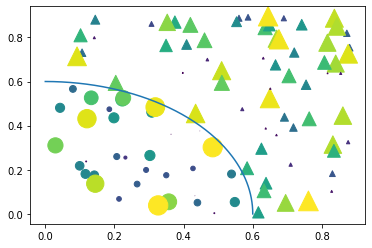

In [11]:


# IMPLEMENTANDO SCATTER PLOT
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)

plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)


# Mostra os limites (bordas) entre as regiões:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()


In [88]:
# CRIANDO A MATRIZ
#np.arange?
a=0
b=0
# Primeiro vetor com 15 elementos:
a = np.arange(1, 16)
print('array de a =', a)
areshape = a.reshape(3, 5)  # 3 dimensões com 5 colunas
print('array de areshape =', areshape)

# Segundo vetor
#np.array?
b = np.array([6, 7, 8])
print('array de b =', b)

#breshape = b.reshape(1, 2)  # 1 dimensão com 2 colunas
#print('array de areshape =', breshape)




print('========= Resultado (a) matriz a + constante 10:')
print(a + 15)
print('matriz original de 1 a 15:')
print(a)



print('========= Resultado (b) matriz b + constante 3:')
print(b + 3)
print('matriz original de 6 a 8:')
print(b)


# podemos combinar os arrays no processamento
# multiplicando cada elemento de "a" * 10.
c = a * 10
print('========= Resultado (c) a * 10')
print(c)

# podemos combinar os arrays no processamento
# dividr cada elemento de "a" / "c".
print('========= Resultado (d)  a / c')
array_divisao = a / c
print(array_divisao)

# podemos combinar os arrays no processamento
# produto de cada elemento "a" * "c".
print('========= Resultado (e)  a * c')
array_produto = a * c
print(array_produto)

# podemos combinar os arrays no processamento
# produto de cada elemento "a" - "c".
print('========= Resultado (f)  a - c')
subtrair = a - c
print(subtrair)


# para fazer o produto matricial precisamos
# garantir as propriedades matemáticas
# (número de colunas da primeira matriz =
# número de linhas da segunda matriz), por
# isso fizemos o transpose da segunda matriz
print('========= Produto matricial')
array_produto_matricial = a.dot(c.transpose())
print(array_produto_matricial)


array de a = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
array de areshape = [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
array de b = [6 7 8]
========= Resultado (a) matriz a + constante 10:
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
matriz original de 1 a 15:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
========= Resultado (b) matriz b + constante 3:
[ 9 10 11]
matriz original de 6 a 8:
[6 7 8]
========= Resultado (c) a * 10
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150]
========= Resultado (d)  a / c
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
========= Resultado (e)  a * c
[  10   40   90  160  250  360  490  640  810 1000 1210 1440 1690 1960
 2250]
========= Resultado (f)  a - c
[  -9  -18  -27  -36  -45  -54  -63  -72  -81  -90  -99 -108 -117 -126
 -135]
========= Produto matricial
12400


========= Matriz (t1)
Tamanho (size) da Matriz = 358211
Shape da Matriz = (511, 701)
ItemSize da Matriz = 8
Número de dimensões Ndim da Matriz = 2
Dtype da Matriz = int64
[[58 59 57 ... 47 47 45]
 [58 59 57 ... 47 50 51]
 [57 57 57 ... 47 45 45]
 ...
 [47 46 46 ... 37 35 36]
 [48 52 53 ... 36 37 44]
 [42 46 47 ... 37 38 45]]
========= Matriz (t2)
Tamanho da Matriz = 357510
Tamanho (size) da Matriz = 357510
Shape da Matriz = (510, 701)
ItemSize da Matriz = 8
Ndim da Matriz = 2
Dtype da Matriz = int64
[[75 77 74 ... 58 58 59]
 [74 76 75 ... 58 60 62]
 [74 76 76 ... 59 58 62]
 ...
 [81 76 79 ... 58 51 53]
 [74 73 73 ... 66 70 60]
 [63 66 66 ... 68 75 72]]
========= Matriz (população)
Tamanho da Matriz = 358211
Tamanho (size) da Matriz = 358211
Shape da Matriz = (511, 701)
ItemSize da Matriz = 8
Ndim da Matriz = 2
Dtype da Matriz = int64
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


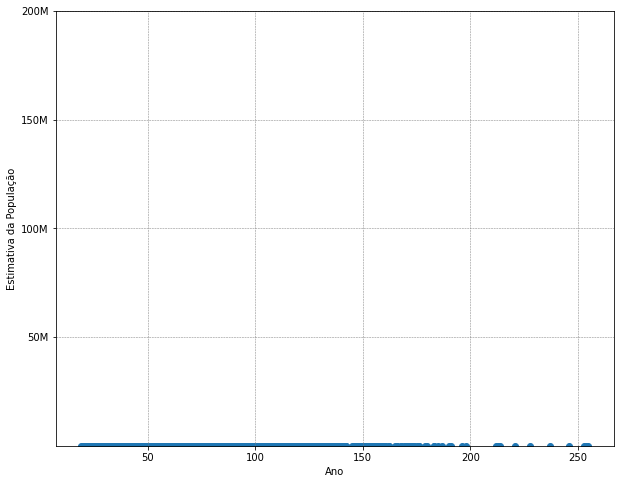

In [98]:
# (b) crie uma nova matriz delta = t2 - t1 utilizando os operadores aritméticos da NumPy. 
# Gere uma visualização desta matriz, e apresente um scatterplot contendo como eixos, 
# as imagens 𝑡1,𝑡2.
# Observação: Veja que a imagem 𝑡1 possui uma linha a mais que a imagem 𝑡2. Você precisará ajustar a 
# imagem 𝑡1 descartando a última linha.

# importar bibliotecas
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
###################################################
# Abrir a primeira imagem (1)
dataset = gdal.Open('CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif', gdal.GA_ReadOnly)
# obter a banda (neste caso a imagem só tem 1 banda)  (1)
banda = dataset.GetRasterBand(1)
# obter a matriz de pixels da banda  (1)
t1 = banda.ReadAsArray().astype(int)
print('========= Matriz (t1)')
print('Tamanho (size) da Matriz =',t1.size)
print('Shape da Matriz =',t1.shape)
print('ItemSize da Matriz =',t1.itemsize)
print('Número de dimensões Ndim da Matriz =',t1.ndim)
print('Dtype da Matriz =',t1.dtype)
print(t1)

#np.shape?
#np.reshape?

# Redefinindo tamanho do shape da matriz
#t1_reshape = t1.reshape(2, 8)
#t1_reshape = t1.reshape((510, 701)

####################################################
# Testando "reshape"
#  t1_reshape = t1.arange(100).reshape(, )  # the values to be color-mapped
#  x, y = np.meshgrid(t1.arange(11), t1.arange(11))
##################################################





#print('========= Matriz (t1_reshape)')
#print('Tamanho (size) da Matriz =',t1_reshape.size)
#print('Shape da Matriz =',t1_reshape.shape)
#print('ItemSize da Matriz =',t1_reshape.itemsize)
#print('Ndim da Matriz =',t1_reshape.ndim)
#print('Dtype da Matriz =',t1_reshape.dtype)

###################################################
# Abrir a segunda imagem (2)
dataset2 = gdal.Open('CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif', gdal.GA_ReadOnly)
# obter a banda (neste caso a imagem só tem 1 banda)  (1)
banda2 = dataset2.GetRasterBand(1)
# obter a matriz de pixels da banda  (1)
t2 = banda2.ReadAsArray().astype(int)
print('========= Matriz (t2)')
print('Tamanho da Matriz =', t2.size)
print('Tamanho (size) da Matriz =',t2.size)
print('Shape da Matriz =',t2.shape)
print('ItemSize da Matriz =',t2.itemsize)
print('Ndim da Matriz =',t2.ndim)
print('Dtype da Matriz =',t2.dtype)
print(t2)


#matriz_delta = t2 - t1

#print('========= Matriz Delta = t2 - t1')
#array_produto_matricial = a.dot(c.transpose())
#print(matriz_delta)


# IMPLEMENTANDO SCATTER PLOT
#ano = t1_reshape
popula = t2
popula = np.zeros_like(t1)
#print(c)



print('========= Matriz (população)')
print('Tamanho da Matriz =', popula.size)
print('Tamanho (size) da Matriz =',popula.size)
print('Shape da Matriz =',popula.shape)
print('ItemSize da Matriz =',popula.itemsize)
print('Ndim da Matriz =',popula.ndim)
print('Dtype da Matriz =',popula.dtype)
print(popula)

populacao = popula

plt.figure( figsize=(10, 8) )
plt.scatter(ano, populacao)
plt.xlabel("Ano")
plt.ylabel("Estimativa da População")

plt.title("")

plt.yticks([ 50, 100, 150, 200 ],
           [ '50M', '100M', '150M', '200M' ] );

plt.grid(b=True, color='gray', linestyle='--', linewidth=0.5);

plt.show()





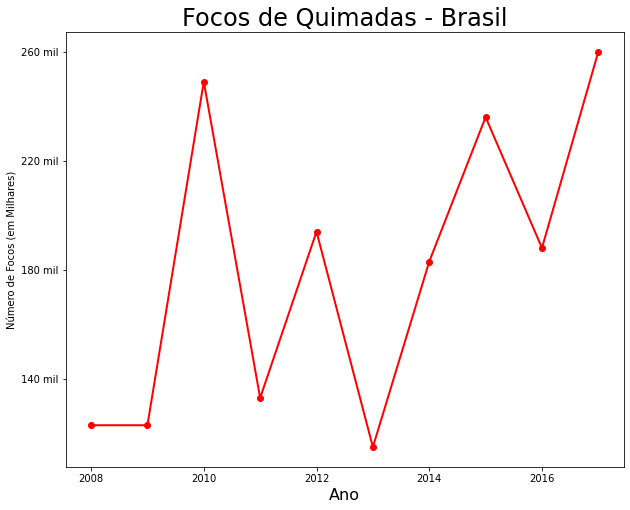

In [7]:
# importar bibliotecas
#from osgeo import gdal
#import numpy as np
#import matplotlib.pyplot as plt
# Exemplo de Vetor/Matriz
# Eixo X  
ano = [ 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ]
# Eixo Y
num_focos = [ 123, 123, 249, 133, 194, 115, 183, 236, 188, 260 ]

# Saída
# Tamanho da Figura
plt.figure( figsize=(10,8))

#plt.plot( ano, num_focos, color="red", linestyle="dashed", linewidth=3, marker='s', markersize=20, mew=5, mec='blue', mfc='lighblue')

# Descrição dos eixos
plt.xlabel("Ano", fontsize=16)
plt.ylabel("Número de Focos (em Milhares)")

# Titulo
plt.title("Focos de Quimadas - Brasil", fontsize=24)

# Controlar intervalos do eixo Y
plt.yticks([100, 140, 180, 220, 260 ],
['100 mil','140 mil', '180 mil', '220 mil', '260 mil']);

# Pinta linha contínua em vermelho com pontos circulares
plt.plot(ano, num_focos, "ro-", linewidth=2.0)


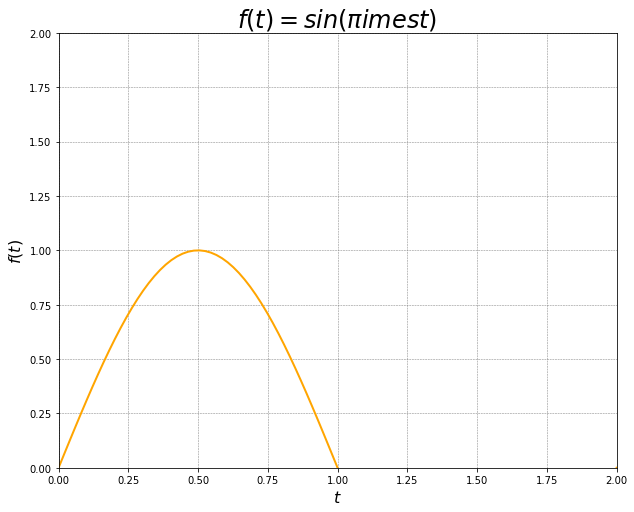

In [8]:
####### Criando a matriz
# função linspace, com os parâmetros abaixo, cria 100 elementos entre 0.0 e 2.0 
t = np.linspace(0.0, 2.0, 100)

# função sin calcula o seno dos valores de uma matriz
f = np.sin(np.pi * t)

# Saída
# Tamanho da Figura
plt.figure( figsize=(10,8))

plt.plot(t, f, "orange", linewidth=2.0)

plt.xlim([0.0, 2.0])
plt.ylim([0.0, 2.0])



plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$f(t)$", fontsize=16)

# Titulo
#plt.title("Focos de Quimadas - Brasil", fontsize=24)
plt.title("$f(t)=sin(\pi \times t$)", fontsize=24)

# Inclui uma grade de fundo no gráfico
plt.grid(b=True, color='gray', linestyle='--', linewidth=0.5);


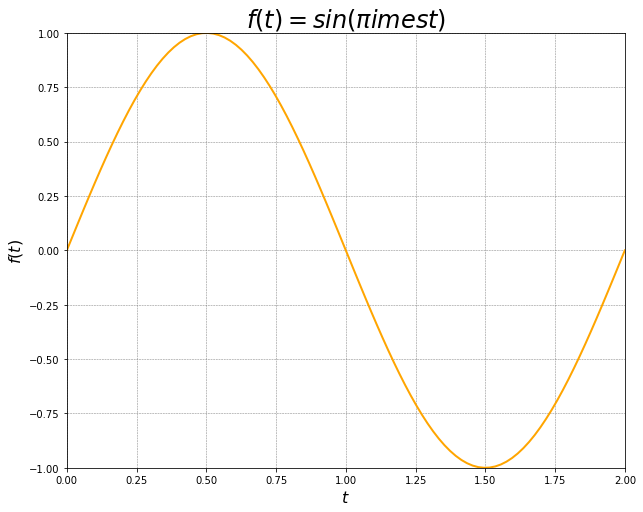

In [9]:
####### Criando a matriz
# função linspace, com os parâmetros abaixo, cria 100 elementos entre 0.0 e 2.0 
t = np.linspace(0.0, 2.0, 100)

# função sin calcula o seno dos valores de uma matriz
f = np.sin(np.pi * t)

# Saída
# Tamanho da Figura
plt.figure( figsize=(10,8))

plt.plot(t, f, "orange", linewidth=2.0)

plt.xlim([0.0, 2.0])
plt.ylim([-1.0, 1.0])



plt.xlabel(r"$t$", fontsize=16)
plt.ylabel(r"$f(t)$", fontsize=16)

# Titulo
#plt.title("Focos de Quimadas - Brasil", fontsize=24)
plt.title("$f(t)=sin(\pi \times t$)", fontsize=24)

# Inclui uma grade de fundo no gráfico
plt.grid(b=True, color='gray', linestyle='--', linewidth=0.5);


Text(0.5, 0.98, 'Senoides')

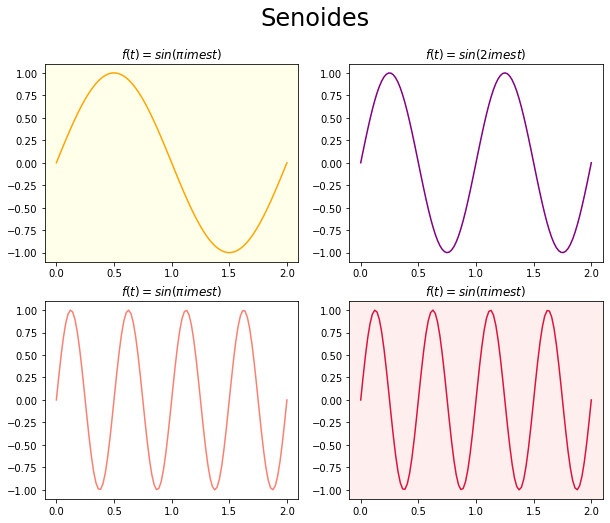

In [10]:
####### Criando a matriz
# função linspace, com os parâmetros abaixo, cria 100 elementos entre 0.0 e 2.0 
t = np.linspace(0.0, 2.0, 100)

f1 =   np.sin(np.pi * t)
f2 =   np.sin(2 * np.pi * t)
f3 =   np.sin(4 * np.pi * t)
f4 =   np.sin(8 * np.pi * t)

# Saída
# Tamanho da Figura
plt.figure( figsize=(10,8))

# função sin calcula o seno dos valores de uma matriz
#f = np.sin(np.pi * t)

plt.subplot(221, facecolor="#FFFFEA")
plt.plot(t, f1, "orange")
plt.title("$f(t)=sin(\pi \times t)$")

plt.subplot(222)
plt.plot(t, f2, "purple")
plt.title("$f(t)=sin(2 \times t)$")

plt.subplot(223)
plt.plot(t, f3, "salmon")
plt.title("$f(t)=sin(\pi \times t)$")

plt.subplot(224, facecolor="#FEEEEE")
plt.plot(t, f3, "Crimson")
plt.title("$f(t)=sin(\pi \times t)$")

plt.suptitle("Senoides", fontsize=24)






In [ ]:
# (c) verifique os limites mínimos e máximos da matriz resultante, e defina um intervalo de pixels que você considera
# como mudança e um intervalo que considera como não mudança. A partir destes intervalos, gere uma visualização de uma 
# classificação de mudança versus não mudança. 










# Verificar na aba de arquivos ao lado (pode ser necessário atualizar) o novo arquivo imagem_com_contraste.tif. Você pode abrir os 2 arquivos num SIG, e confirmar se o salvamento foi adequado.